<a href="https://colab.research.google.com/github/Alam710/Object-Oriented-programming/blob/main/Nomor_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2301978476 - Hafizh Ash Shiddiqi

2301978450 - Afdhal Kurniawan

2301978444 - Islam Nur Alam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('DIABETES.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Correlation = data.corr()
Correlation['Outcome'].abs().sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [4]:
# We select atributes having corr.coeff larger than 0.10
dataset = data[['Glucose', 'BMI', 'Age', 'Pregnancies', \
                'DiabetesPedigreeFunction', 'Insulin', 'Outcome']]
dataset.head()

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,Outcome
0,148,33.6,50,6,0.627,0,1
1,85,26.6,31,1,0.351,0,0
2,183,23.3,32,8,0.672,0,1
3,89,28.1,21,1,0.167,94,0
4,137,43.1,33,0,2.288,168,1


In [11]:
X = dataset.iloc[:, :-1]    # independent varible
y = dataset.iloc[:, -1]     # dependent variable

X.head()

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[ 0.84832379  0.20401277  1.4259954   0.63994726  0.46849198 -0.69289057]
 [-1.12339636 -0.68442195 -0.19067191 -0.84488505 -0.36506078 -0.69289057]
 [ 1.94372388 -1.10325546 -0.10558415  1.23388019  0.60439732 -0.69289057]
 [-0.99820778 -0.49404308 -1.04154944 -0.84488505 -0.92076261  0.12330164]
 [ 0.5040552   1.4097456  -0.0204964  -1.14185152  5.4849091   0.76583594]
 [-0.15318486 -0.81134119 -0.27575966  0.3429808  -0.81807858 -0.69289057]
 [-1.34247638 -0.12597727 -0.61611067 -0.25095213 -0.676133    0.07120427]
 [-0.184482    0.41977549 -0.36084741  1.82781311 -1.02042653 -0.69289057]
 [ 2.38188392 -0.18943689  1.68125866 -0.54791859 -0.94794368  4.02192191]
 [ 0.12848945 -4.06047387  1.76634642  1.23388019 -0.7244549  -0.69289057]]


In [8]:
idx = np.where(np.isnan(X))
X[idx] = np.take(np.nanmedian(X, axis = 0), idx[1])

In [13]:
y = dataset["Outcome"].values
y.shape

(768,)

In [14]:
if y[0] == 2:
  y = np.array(y == 4, dtype=np.float32)

In [15]:
y.shape, y[:10]

((768,), array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1]))

In [16]:
X = np.hstack((np.ones((len(X), 1)), X))

In [17]:
X[:10]

array([[1.000e+00, 1.480e+02, 3.360e+01, 5.000e+01, 6.000e+00, 6.270e-01,
        0.000e+00],
       [1.000e+00, 8.500e+01, 2.660e+01, 3.100e+01, 1.000e+00, 3.510e-01,
        0.000e+00],
       [1.000e+00, 1.830e+02, 2.330e+01, 3.200e+01, 8.000e+00, 6.720e-01,
        0.000e+00],
       [1.000e+00, 8.900e+01, 2.810e+01, 2.100e+01, 1.000e+00, 1.670e-01,
        9.400e+01],
       [1.000e+00, 1.370e+02, 4.310e+01, 3.300e+01, 0.000e+00, 2.288e+00,
        1.680e+02],
       [1.000e+00, 1.160e+02, 2.560e+01, 3.000e+01, 5.000e+00, 2.010e-01,
        0.000e+00],
       [1.000e+00, 7.800e+01, 3.100e+01, 2.600e+01, 3.000e+00, 2.480e-01,
        8.800e+01],
       [1.000e+00, 1.150e+02, 3.530e+01, 2.900e+01, 1.000e+01, 1.340e-01,
        0.000e+00],
       [1.000e+00, 1.970e+02, 3.050e+01, 5.300e+01, 2.000e+00, 1.580e-01,
        5.430e+02],
       [1.000e+00, 1.250e+02, 0.000e+00, 5.400e+01, 8.000e+00, 2.320e-01,
        0.000e+00]])

In [18]:
m, n = X.shape
K = 2
K, m, n

(2, 768, 7)

In [24]:
theta = np.zeros(n)

In [25]:
def g(z):
  """ sigmoid """
  return 1 / (1 + np.exp(-z))

In [26]:
def h(X, theta):
  return g(X @ theta)

In [27]:
preds = h(X, theta)
preds.shape, preds[:10]

((768,), array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]))

Cost function & gradients

In [28]:
def J(preds, y):
  return 1/m * (-y @ np.log(preds) - (1 - y) @ np.log(1 - preds))

def compute_gradient(theta, X, y):
  preds = h(X, theta)
  gradient = 1/m * X.T @ (preds - y)
  return gradient

compute_gradient(theta, X, y)
preds = h(X, theta)
J(preds, y)

0.6931471805599451

In [29]:
hist = {'loss': [], 'acc': []}
alpha = 0.1

for i in range(100):
  gradient = compute_gradient(theta, X, y)
  theta -= alpha * gradient

  # loss
  preds = h(X, theta)
  loss = J(preds, y)
  hist['loss'].append(loss)

  # acc
  c = 0
  for j in range(len(y)):
    if (h(X[j], theta) > .5) == y[j]:
      c += 1
  acc = c / len(y)
  hist['acc'].append(acc)

  # print stats
  if i % 10 == 0: print(loss, acc)

81.48207786452328 0.6510416666666666
nan 0.6510416666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


nan 0.6510416666666666
nan 0.3502604166666667
nan 0.5130208333333334
nan 0.3528645833333333
nan 0.64453125
nan 0.5416666666666666
nan 0.6510416666666666
nan 0.3502604166666667


In [33]:
hist['loss'][-1], hist['acc'][-1]

(nan, 0.3580729166666667)

In [34]:
preds = h(X, theta) > 0.5
(preds == y).sum() / len(y)

0.3580729166666667

In [35]:
def precision(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fp = ((preds == 1) == (y == 0)).sum()
  return tp / (tp + fp)

precision(preds, y)

0.3580729166666667

In [36]:
def recall(preds, labels):
  tp = ((preds == 1) == (y == 1)).sum()
  fn = ((preds == 0) == (y == 1)).sum()
  return tp / (tp + fn)

recall(preds, y)

0.3580729166666667

In [37]:
def f1(preds, labels):
  return 2 * (precision(preds, labels) * recall(preds, labels)) / (precision(preds, labels) + recall(preds, labels))

f1(preds, y)

0.3580729166666667

In [40]:
recalls = []
for p in range(100):
  preds = (h(X, theta) > (p / 100))
  r = recall(preds, y)
  recalls.append(r)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=0)

# The following is an example of using LR from Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

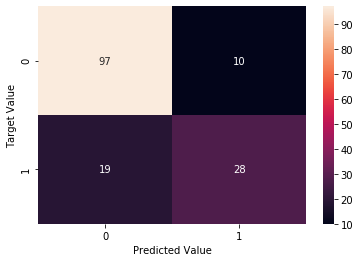

In [ ]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Target Value'], colnames = ['Predicted Value'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

